In [2]:
# On importe des petits modules python bien sympa
# numpy : fonctions mathématiques vraiment convenables !
import numpy as np
import os
# taille des figures
from graphs import *
from exo import *

plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["font.size"] = 20

def get_files_directory(directory, pattern="AFC"):
    if directory[-1] != "/":
        directory += "/"
    return [directory + fichier for fichier in os.listdir(directory) if  pattern in fichier]

# On définit la classe Eleve
class Eleve:
    '''
    Ceci est la description de la classe
    Si tu as un problème avec cette classe
    tu peux taper help(Eleve)
    '''

    def __init__(self, directory, name_surname):
        self.directory = directory
        self.name_surname = name_surname
        #self.file = file 
        self.create_exos()
    
    def create_exos(self):
        # On crée des tuples qui associent un pattern
        # dans un fichier à la classe d'Exo qui lui correspond
        # les élements de assos sont des couples (pattern, classe)
        assos = [("2AFC", AFC2),
                 ("5AFC", AFC5)]
        exos = []
        # Pour chaque pattern, classe dans la liste assos
        for pattern, cl in assos:
            # On récupère les paths des fichiers correspondant au pattern
            # dans le directory de l'élève
            path_list = get_files_directory(self.directory, pattern=pattern)
            # Pour chacun de ces paths de fichiers
            for exo_path in path_list:
                # On instancie la classe d'exercice qui va bien
                exo = cl(exo_path)
                # On ajoute cette instance à la liste d'exos
                exos.append(exo)
        # Une fois la liste d'exos mise en place
        # elle est attribuée à l'élève
        self.exos = exos
        
    def criteria_by_key(self, key, criteria):
        dico = {}
        # Pour chaque exo, on récupère les labels et les values
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            #print(labels, values)
            # Pour chaque label récupéré
            # On somme le nombre d'occurence
            # avec ce qui a déja été sommé,
            # mais attentioooon ! si c'est
            # la première fois qu'on rencontre ce
            # label, il faut initialiser sa valeur dans le dico
            for i , label in enumerate(labels):
                if label not in dico.keys():
                    dico[label] = values[i]
                else:
                    dico[label] += values[i]
            
        # On veut retourner une liste de labels
        # et une liste de values sous la forme
        # d'un np array pour notre fonction
        # d'affichage fancy.
        # pour ce faire, on récupère les
        # clés et les valeurs de notre dictionnaire
        # dans un np array (d'où les deux lignes chelous !)
        labels = np.array(list(dico.keys()))
        values = np.array(list(dico.values()))
        # Si la valeur vaut 0, rien à foutre !
        sel_arr = values != 0
        labels = labels[sel_arr]
        values = values[sel_arr]
        # On retourne nos petites données
        # et en avant !
        return labels, values
    
    
    def chart_all_exos(self, key, criteria, title):
        
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            print(exo.path)
            plot_chart(labels, values, title)
            
    def hist_all_exos(self, key, criteria, title, xlabel, ylabel, xrotation=None, yrotation=None):
        for exo in self.exos:
            labels, values = exo.criteria_by_key(key, criteria)
            print(exo.path)
            plot_hist(labels, values, title, xlabel, ylabel, xrotation=xrotation, yrotation=yrotation)


In [2]:
dossier_exemple = "/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles"
AFC2_exemple = dossier_exemple + "/5AFC_1_Sat_Feb_27_09_53_53_2021.log"
AFC5_exemple = dossier_exemple + "/5AFC_2_Sat_Feb_27_10_14_35_2021.log"



In [3]:
maliste = [1, 2, 3]
maliste.append(4)
print(maliste)

[1, 2, 3, 4]


/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles
/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles/2AFC_i_Wed_May_19_18_03_48_2021.log


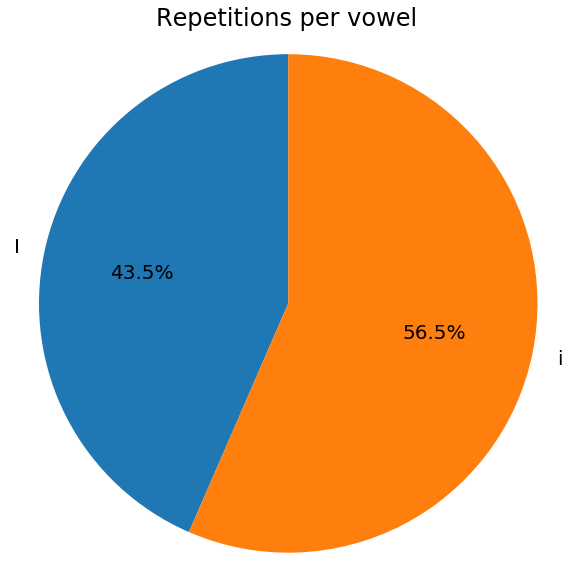

/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles/5AFC_2_Wed_May_19_18_09_28_2021.log


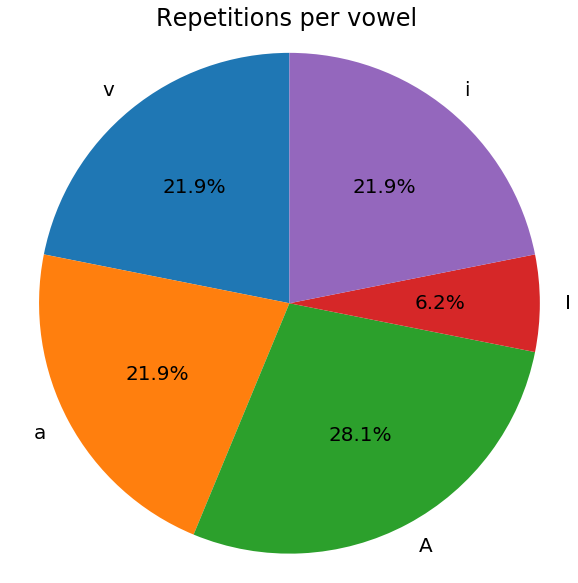

/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles/2AFC_i_Wed_May_19_18_03_48_2021.log


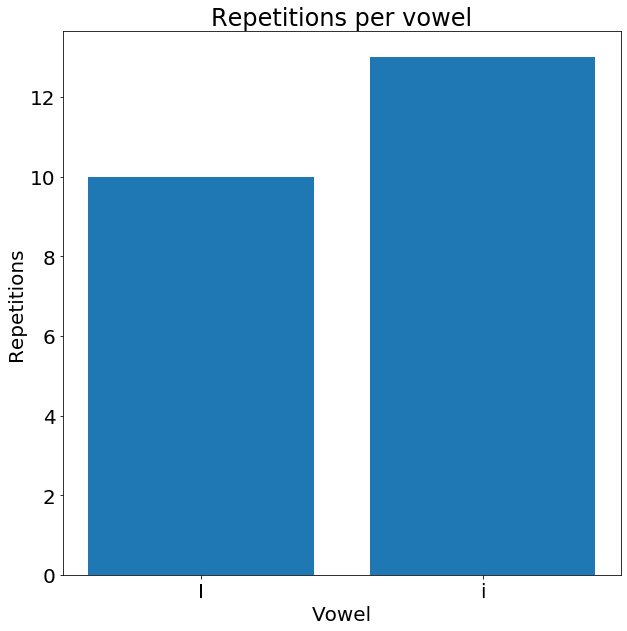

/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles/5AFC_2_Wed_May_19_18_09_28_2021.log


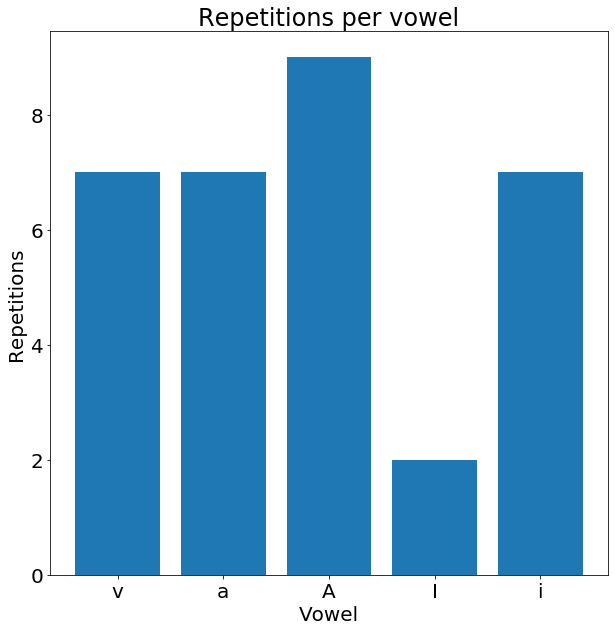

Chart et hist de tout


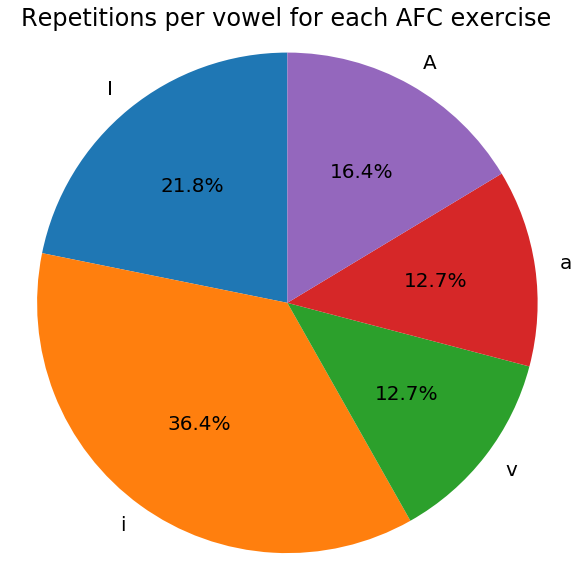

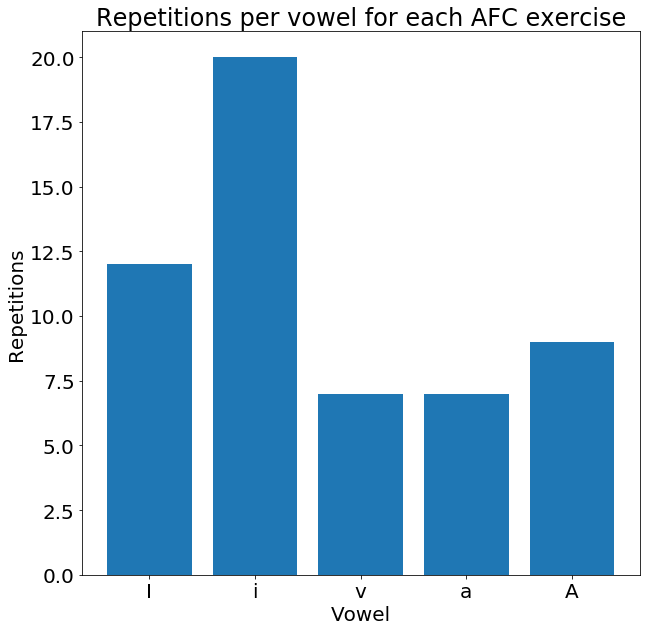

In [4]:
sarah = Eleve(dossier_exemple, "Moreira Sarah")
print(sarah.directory)
sarah.chart_all_exos("Vowel", "Repetitions", "Repetitions per vowel")
sarah.hist_all_exos("Vowel", "Repetitions", "Repetitions per vowel", "Vowel", "Repetitions")
sarah.criteria_by_key("Vowel", "Repetitions")
labels, values = sarah.criteria_by_key("Vowel", "Repetitions")


print("Chart et hist de tout")
plot_chart(labels, values, "Repetitions per vowel for each AFC exercise")
plot_hist(labels, values, "Repetitions per vowel for each AFC exercise", "Vowel", "Repetitions")

In [5]:
# La variable exo est une instance de AFC2 avec pour paramètre
# le path du fichier d'exercice qui est AFC2_exemple
exo = AFC2(AFC2_exemple)
#exo.display()
labels, values = exo.criteria_by_key("Vowel", "Repetitions")

plot_chart(labels, values, "coucou")

plot_hist(labels, values, "coucou", "x", "y")

FileNotFoundError: [Errno 2] No such file or directory: '/home/cheska/Documents/notebooks_sepale/log_files/L1/Aathavan Velan_1365817_assignsubmission_file_/logFiles/logFiles/5AFC_1_Sat_Feb_27_09_53_53_2021.log'